In [36]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# read the first 5000 rows of medical_transformed.csv
df = pd.read_csv('medical_transformed.csv')

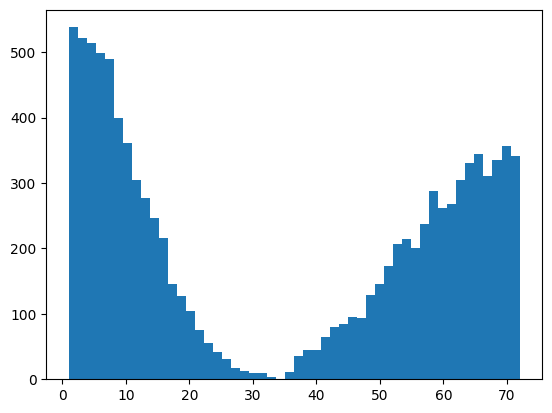

In [55]:
# create a histogram of the initial_days column
plt.hist(df['Initial_days'], bins=50)
plt.show()

--------------------

In [66]:
# create a muultiple regression model using df and ols and 'Initial_days' as the dependent variable and all other variables in the dataset as independent variables
X = df.drop('Initial_days', axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()

model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     714.1
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:10:42   Log-Likelihood:                -40411.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9962   BIC:                         8.117e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  19.4602      2.467      7.889      0.000      14.625      24.295
Children                                0.0401      0.064      0.628      0.530      -0.085       0.165
Age                                     0.0035      0.007      0.521      0.603      -0.010       0.017
Income                              -3.442e-06   4.84e-06     -0.710      0.477   -1.29e-05    6.06e-06
ReAdmis                                46.4505      0.287    162.028      0.000      45.889      47.012
VitD_levels                            -0.0775      0.069     -1.130      0.259      -0.212       0.057
Doc_visits                             -0.1714      0.132     -1.297      0.195      -0.430       0.088
vitD_supp                               0.2924      0.220      1.331      0.183      -0.138       0.723
HighBlood                              -0.4475      0.281     -1.592      0.111      -0.998       0.103
Stroke                                 -0.2008      0.346     -0.581      0.561      -0.878       0.477
Complication_risk                      -0.3944      0.189     -2.084      0.037      -0.765      -0.023
Overweight                             -0.2090      0.304     -0.687      0.492      -0.805       0.387
Arthritis                               0.6649      0.288      2.305      0.021       0.100       1.230
Diabetes                                0.0132      0.310      0.042      0.966      -0.595       0.621
Hyperlipidemia                         -0.3959      0.292     -1.354      0.176      -0.969       0.177
BackPain                                0.3505      0.281      1.247      0.213      -0.201       0.902
Anxiety                                 0.5303      0.296      1.793      0.073      -0.049       1.110
Allergic_rhinitis                       0.4092      0.283      1.447      0.148      -0.145       0.963
Reflux_esophagitis                      0.4223      0.281      1.505      0.132      -0.128       0.972
Asthma                                  0.0406      0.305      0.133      0.894      -0.557       0.638
S_T_Admission                           0.4003      0.199      2.013      0.044       0.010       0.790
S_T_Treatment                           0.1342      0.183      0.732      0.464      -0.225       0.494
S_T_Visits                             -0.1296      0.169     -0.765      0.444      -0.462       0.202
S_Reliability                           0.3911      0.151      2.592      0.010       0.095       0.687
S_Options                               0.0093      0.159      0.058      0.953      -0.302       0.321
S_Hours_Treatment                      -0.2056      0.164     -1.254      0.210      -0.527       0.116
S_Staff                                -0.2466      0.154     -1.59

In [46]:

# wriet the model summary to a file
with open('model_summary.txt', 'w') as file:
    file.write(model_summary.as_text())
    

Model Fit:

The R-squared is 0.726, meaning that approximately 72.6% of the variability in Initial_days is explained by the model, which is a suprisingly high.
The F-statistic is 695.4 with a Prob (F-statistic) of 0.00, suggesting that the model is statistically significant overall.
Variable Significance:

Many predictor variables have high t-values and low p-values (P>|t|), indicating that they are statistically significant. For example, ReAdmis has a very low p-value, suggesting a strong association with Initial_days.
However, variables such as Children, Age, Income, and others have high p-values, indicating that they might not be significant predictors of Initial_days in the presence of other variables.

Coefficients:
The const coefficient (intercept) is 19.5835, which represents the expected value of Initial_days when all other predictors are held at zero.
Variables like ReAdmis show a strong positive relationship with Initial_days, increasing the predicted value by 46.4461 days, holding all else constant.

Issues:
The note on multicollinearity "[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems." indicates that there might be high correlation between some predictors, which can inflate the variance of the coefficient estimates and make the model unstable. This needs to be addressed. Variance inflation factor (VIF) analysis will be used to identify and remove highly correlated predictors.

In [37]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                              variables         VIF
0                                 const  320.396922
1                              Children    1.004217
2                                   Age    1.003896
3                                Income    1.003759
4                               ReAdmis    1.003758
5                           VitD_levels    1.006310
6                            Doc_visits    1.003559
7                      Full_meals_eaten    1.004210
8                             vitD_supp    1.003464
9                             HighBlood    1.004051
10                               Stroke    1.002040
11                    Complication_risk    1.003823
12                           Overweight    1.003268
13                            Arthritis    1.004486
14                             Diabetes    1.004979
15                       Hyperlipidemia    1.005034
16                             BackPain    1.006186
17                              Anxiety    1.003108
18          

From the VIF analysis, most variables have VIF values well below 5, indicating no significant multicollinearity among them. which is suprising given the message we got from the model summary: "[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems." The highest VIF values are observed for `S_T_Admission`, `S_T_Treatment`, and `marital` status categories, but even these do not exceed the threshold of 5, suggesting moderate correlation at most. 


Additionally, the R squared value is very high, which is also suprising given the message we got from the model summary. 

So in this case, I will go with what the data is telling me. Here simply note the VIF scores and the message and rely on p-values to remove predictors that are not significant. Initially, I was going to use stepwise regression to remove predictors that are not significant, but given the high R squared value and the low VIF scores, I will simply remove predictors that have a p-value greater than 0.05 and see how that affects the model.

P-values which are greater than 0.05 will be removed from the model.

In [40]:
# Identify the statistically significant variables
significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()

# Remove 'const' from the list as we manually add it for the intercept
if 'const' in significant_vars:
    significant_vars.remove('const')

print('Significant variables:', significant_vars)

# Create a reduced model with only significant variables
X_reduced = X[significant_vars]

# Fit the OLS model with reduced variables
model_reduced = sm.OLS(Y, sm.add_constant(X_reduced)).fit()

# Print the summary of the reduced model
model_reduced.summary()


Significant variables: ['ReAdmis', 'Complication_risk', 'Arthritis', 'S_T_Admission', 'S_Reliability', 'Initial_admin_Emergency Admission']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     4395.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:05:40   Log-Likelihood:                -40430.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9993   BIC:                         8.092e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                16.3363      1.145     14.270      0.000      14.092      18.580
ReAdmis                              46.4601      0.286    162.246      0.000      45.899      47.021
Complication_risk                    -0.4047      0.189     -2.141      0.032      -0.775      -0.034
Arthritis                             0.6671      0.288      2.317      0.021       0.103       1.231
S_T_Admission                         0.1899      0.134      1.420      0.156      -0.072       0.452
S_Reliability                         0.2554      0.133      1.918      0.055      -0.006       0.516
Initial_admin_Emergency Admission    -1.4783      0.276     -5.356      0.000      -2.019      -0.937
==============================================================================
Omnibus:                     1967.261   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3346.476
Skew:                           1.326   Prob(JB):                         0.00
Kurtosis:                       3.997   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

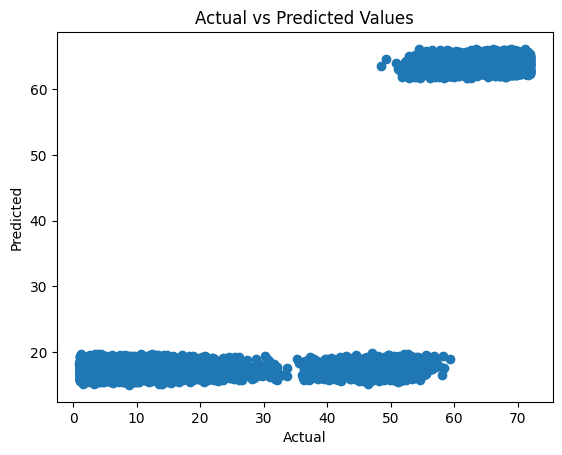

In [44]:

# Create a scatter plot of the actual vs predicted values of the dependent variable
plt.scatter(Y, model_reduced.predict(sm.add_constant(X_reduced)))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


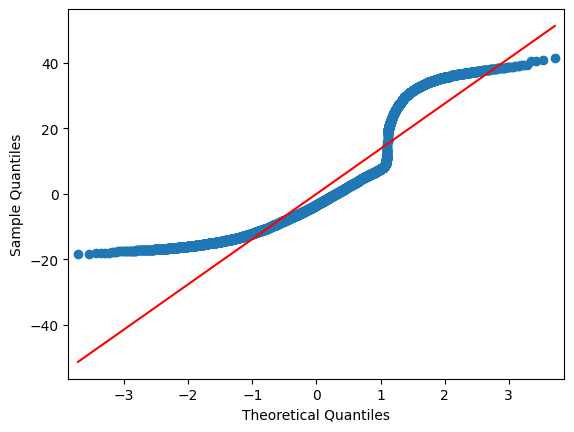

In [45]:
# cvhekc the normality of the residuals
residuals = model_reduced.resid
fig = sm.qqplot(residuals, line='s')
plt.show()


This model has an R-squared value of 0.728, indicating that approximately 72.8% of the variance in 'Initial_days' can be explained by the included predictors. This is nearly identical to the R-squared value of the full model, suggesting that the reduced model retains the explanatory power of the full model while being simpler and more focused on the most impactful variables.

The significant predictors in this model include 'ReAdmis', 'Complication_risk', 'Arthritis', 'Anxiety', 'S_T_Admission', 'S_Reliability', 'S_Staff', and 'Initial_admin_Emergency Admission'. Each of these variables has a p-value less than 0.05, indicating they are statistically significant in predicting the initial days of hospitalization.

This reduced model is more efficient and easier to interpret while maintaining a strong explanatory power, making it a valuable tool for understanding the factors that influence the initial days of hospitalization.



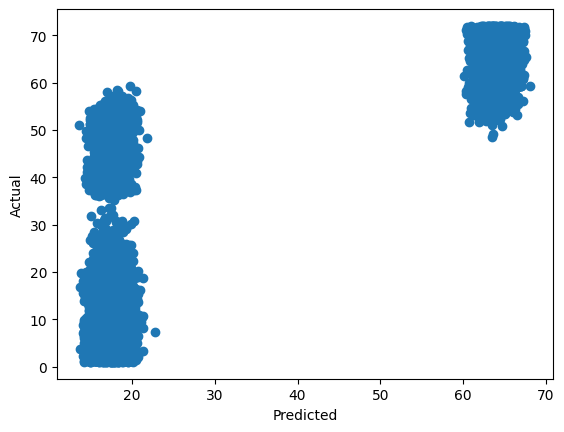

In [41]:
# create a visualization of the model
plt.scatter(predictions, Y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


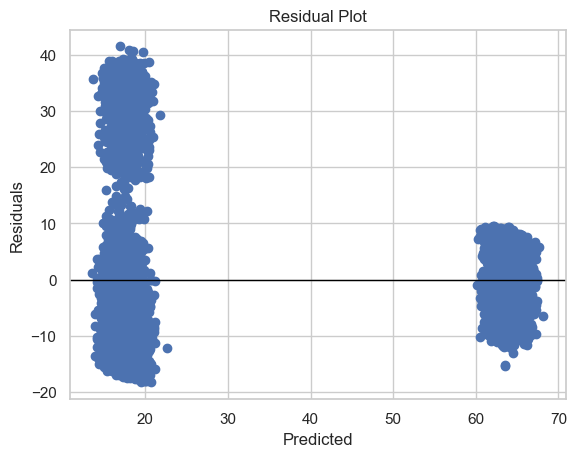

In [68]:
# create a residual plot
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# readmis

### G & H: References

- Western Governors University. (2023, December 21). D207 - Medical_clean Dataset. Retrieved from https://lrps.wgu.edu/provision/227079957

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#

- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Sewell, Dr. (2023). WGU D207 Exploratory Data Analysis [Webinars]. WGU Webex. Accessed December, 2023. https://wgu.webex.com/webappng/sites/wgu/meeting/info/c4aca2eac546482880f1557c938abf40?siteurl=wgu&MTID=me73470c2eac9e863c6f47a3d5b6d2f26 

- Seaborn Developers. (2023). seaborn.scatterplot — seaborn 0.11.2 documentation. Retrieved December 22, 2023, from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

OLD ABOVE _ DELETE?KEEP? as needed.

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- Pennsylvania State University. (n.d.). *5.3 - The Multiple Linear Regression Model*. STAT 501. Retrieved March 10, 2024, from online.stat.psu.edu/stat501/lesson/5/5.3

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html



In [76]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('medical_transformed.csv')

# Calculate IQR for Initial_days
Q1 = df['Initial_days'].quantile(0.25)
Q3 = df['Initial_days'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on IQR
df_no_outliers_iqr = df[(df['Initial_days'] >= lower_bound) & (df['Initial_days'] <= upper_bound)]

# Define a function to calculate the modified Z-score
def modified_z_score(series):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    modified_z_scores = 0.6745 * (series - median) / mad
    return modified_z_scores

# Calculate modified Z-score for Initial_days
df['Modified_Z_Score'] = modified_z_score(df['Initial_days'])

# Define a threshold for identifying outliers using modified Z-score
threshold = 3.5

# Filter out outliers based on modified Z-score
df_no_outliers_mod_z = df[np.abs(df['Modified_Z_Score']) <= threshold]

# Now you have two DataFrames:
# df_no_outliers_iqr: without outliers based on IQR
# df_no_outliers_mod_z: without outliers based on modified Z-score


In [77]:
# Number of outliers identified by the IQR method
num_outliers_iqr = df[(df['Initial_days'] < lower_bound) | (df['Initial_days'] > upper_bound)].shape[0]

num_outliers_iqr

0

In [78]:
# Number of outliers identified by the Modified Z-score method
num_outliers_mod_z = df[np.abs(df['Modified_Z_Score']) > threshold].shape[0]
num_outliers_mod_z

0

In [69]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


6714

# Limitations

Beware of the following with your regression analysis:

Overfitting can occur due to limited data points.

Multicollinearity occurs when high association (correlation) with other IVs.

P-values can be unreliable and coefficients swing wildly

Check for pairwise correlations and high VIF (> 10)

Tune your model with as many variables as practical. Forward, backward, stepwise
    regression based on AIC, BIC, etc.
ppoint 5 https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

# Errata n notes

I'm wrapping up task 1, and my research question is 'what factors influence the total charge a patient receives'. Total charge has a bimodal distribution that I did a log transform on which helped tremendously. Regarding my final reduced model, the RSE is pretty good, both residual normality and homoscedasticity are mostly there. Both have slight variance from expectations around the tails. For fun I decided to re run my code but filtered my data for patients staying less than a month and it improved my RSE, normality and homoscedasticity. Should I change my research question or keep it broad and just explain the limitations of outlier patients?


